# Problem statement

The primary goal is to develop a Product Categorization model leveraging clustering techniques. By analyzing the E-Commerce dataset provided by The UCI Machine Learning Repository, this model aims to automatically group products into meaningful categories based on their features, such as product description, price, customer reviews, and more.

The dataset contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retailer.

The dataset contains the following columns:
- InvoiceNo (integer)
- StockCode (string)
- Description (string)
- Quantity (integer)
- InvoiceDate (date)
- UnitPrice (decimal)
- CustomerID (integer)
- Country (string)

The notebook contains 4 exercises in total:

* [Exercise 1](#ex_1)
* [Exercise 2](#ex_2)
* [Exercise 3](#ex_3)
* [Exercise 4](#ex_4)

## Steps to follow

- **Load the Dataset**: Use Pandas to read the CSV file.
- **Preprocess the Data**: Clean and preprocess the Description text data.
- **Feature Extraction**: Use TF-IDF to convert text descriptions into a vectorized format.
- **Clustering**: Apply the K-Means algorithm to cluster products into categories based on their descriptions.
- **Dimensionality Reduction for Visualization**: Use PCA to reduce the dimensions of the TF-IDF vectors for visualization.
- **Visualize Clusters**: Create a 3D scatter plot of the clusters.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


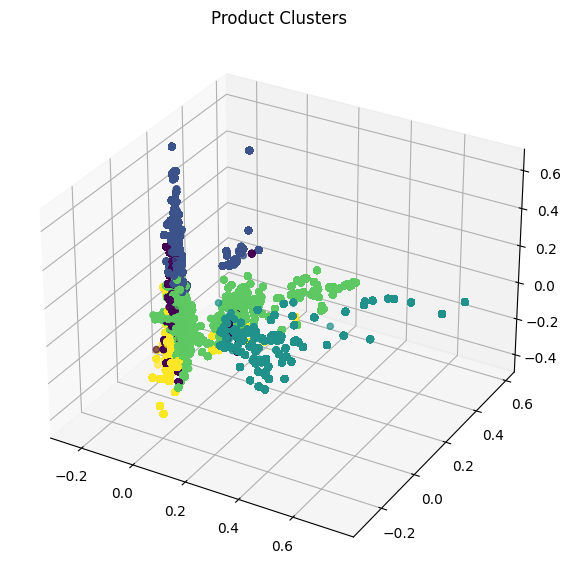

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Step 2: Load the Dataset
# Update this path to where you have stored the dataset
df = pd.read_csv('/content/drive/My Drive/data/clustering-data.csv', encoding='latin1')

# Step 3: Preprocess the Data
def preprocess_text(text):
    # Tokenize, remove stopwords, and keep only alphabetic words
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(tokens)

# Applying the preprocessing function to the Description column
df['Processed_Description'] = df['Description'].dropna().apply(preprocess_text)

# Step 4: Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Description'].dropna())

# Step 5: Clustering
num_clusters = 5  # You might want to adjust this based on experimentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Step 6: Dimensionality Reduction for Visualization
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Step 7: Visualize Clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_features[:,0], reduced_features[:,1], reduced_features[:,2],
                     c=clusters, cmap='viridis')
ax.set_title('Product Clusters')
plt.show()


 Visualise most frequent words occurring in product descriptions assigned to clusters.

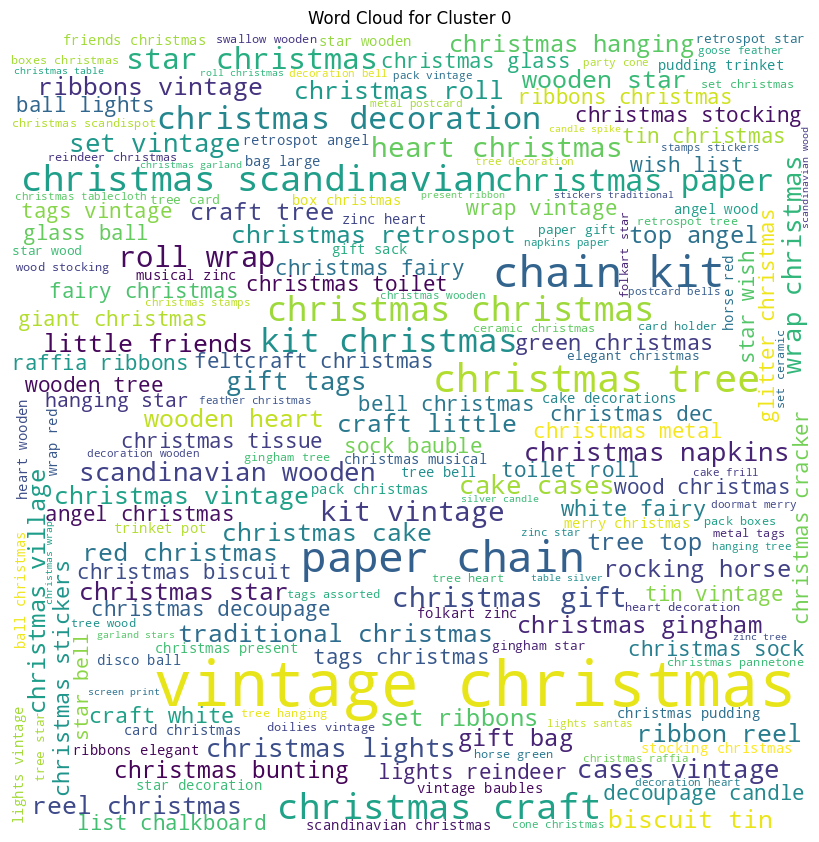

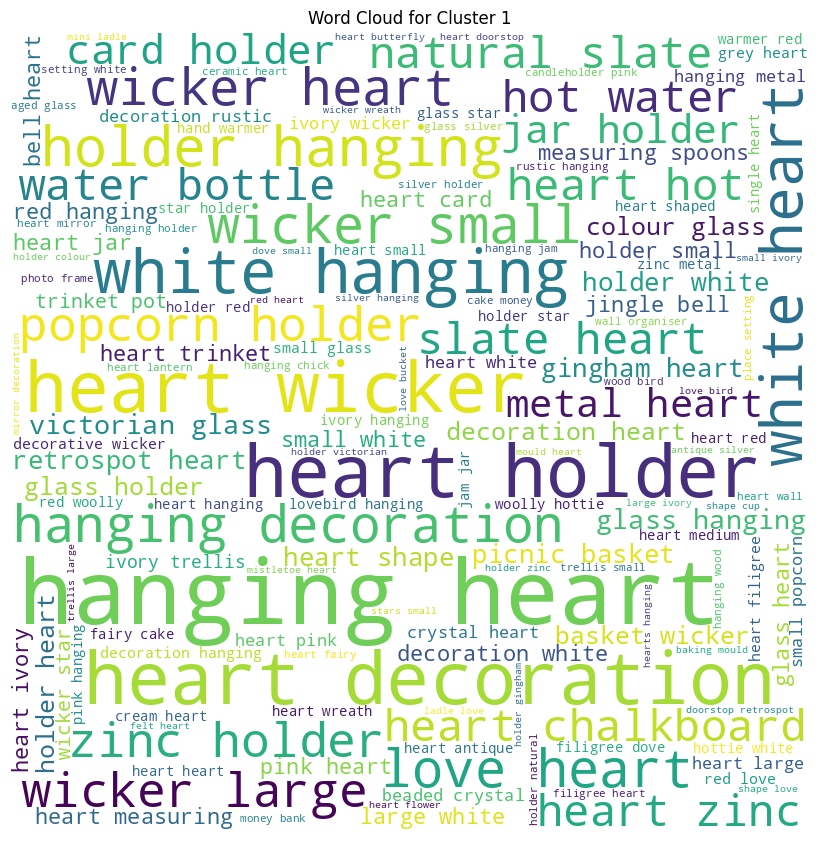

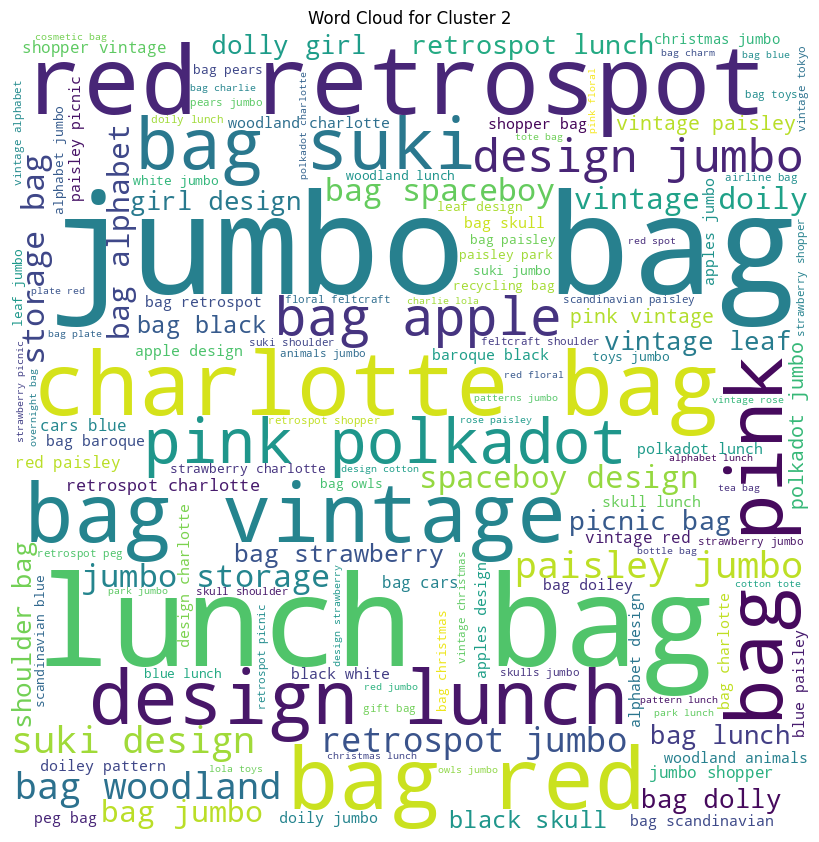

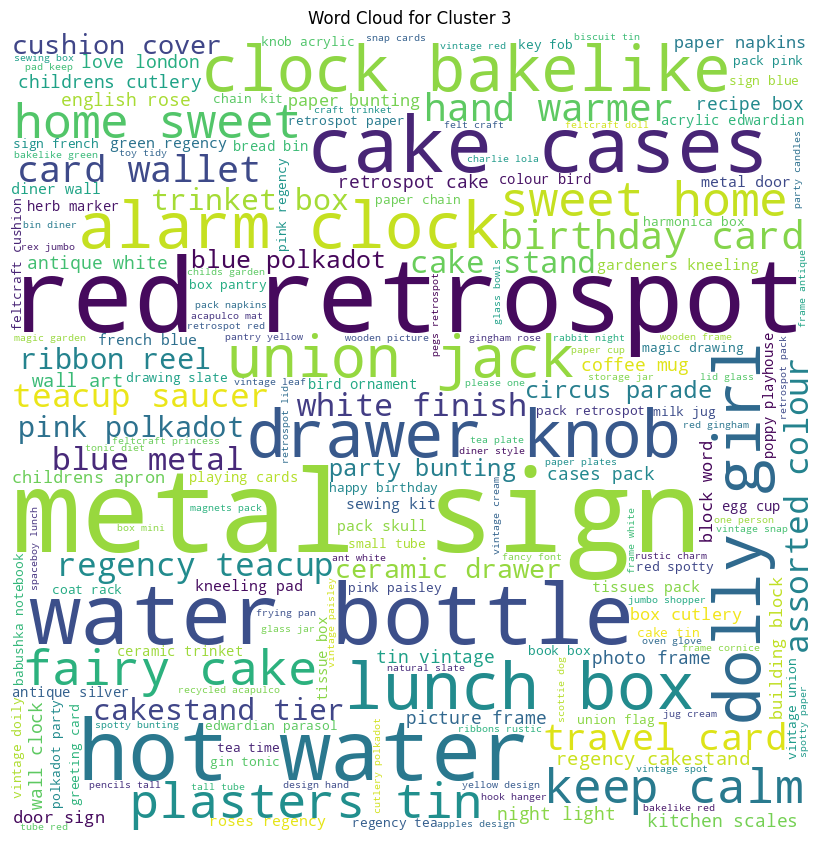

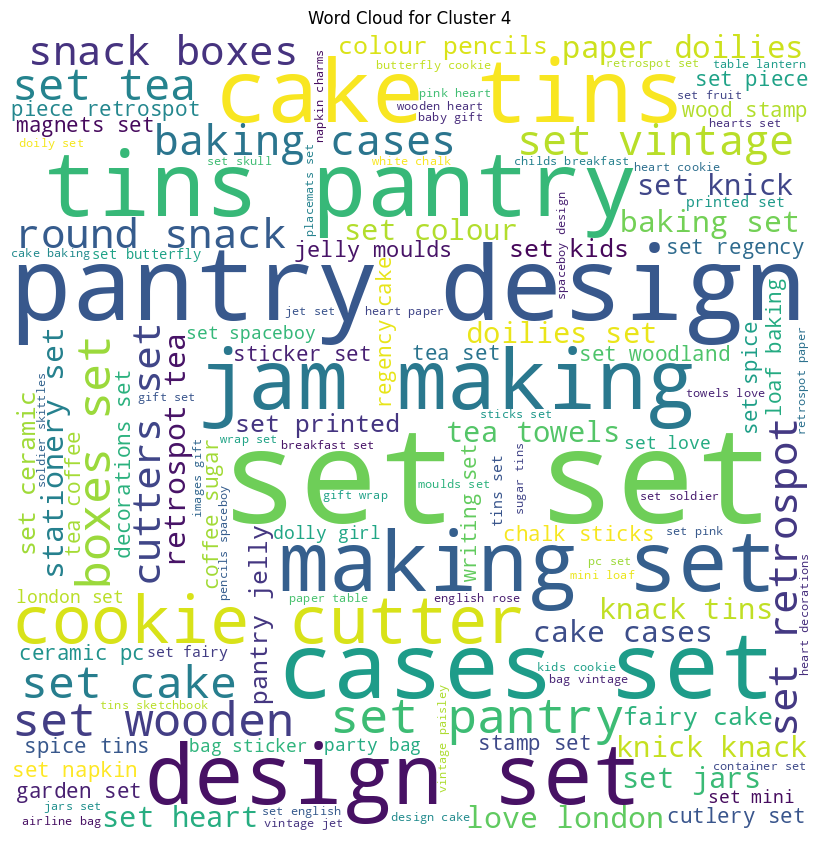

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_clouds(n_clusters, cluster_assignments, documents):
    """
    Generates and displays word clouds for each cluster.

    Parameters:
    - n_clusters (int): Number of clusters.
    - cluster_assignments (array-like): Cluster assignment for each document.
    - documents (array-like): Preprocessed text documents.
    """
    # Iterate through each cluster
    for cluster in range(n_clusters):
        # Filter documents belonging to the current cluster
        cluster_documents = [doc for doc, assignment in zip(documents, cluster_assignments) if assignment == cluster]

        # Join documents into a single string
        text = " ".join(cluster_documents)

        # Generate a word cloud
        wordcloud = WordCloud(width = 800, height = 800,
                              background_color ='white',
                              stopwords = stopwords.words('english'),
                              min_font_size = 10).generate(text)

        # Plot the word cloud
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)
        plt.title(f'Word Cloud for Cluster {cluster}')
        plt.show()

# Example usage
generate_word_clouds(num_clusters, clusters, df['Processed_Description'].dropna().tolist())


<a name="ex_1"></a>
## Exercise 1

Use the describe() function to generate descriptive statistics of the dataset.

This function provides a concise summary of the columns, including count, mean, standard deviation, min, max, and quartile values.

**Questions**:
- What insights can you derive from the output of the describe() method regarding the scale of the data and its distribution?
- How might these statistics influence your preprocessing decisions?

**Answer**: Write your answer here



In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The output of the describe() method on the dataframe provides essential statistical insights into the scale of the data and its distribution for three numerical columns: Quantity, UnitPrice, and CustomerID. Below are the insights and their potential impact on preprocessing decisions:

**Insights on the Scale of Data and Distribution**

Wide Range of Values in Quantity and UnitPrice: Both Quantity and UnitPrice columns exhibit a wide range of values, with extreme minimum and maximum values. For instance, Quantity ranges from -80,995 to 80,995, and UnitPrice ranges from -11,062.06 to 38,970. This suggests a highly skewed distribution with potential outliers or anomalous transactions.

Presence of Negative Values: Both Quantity and UnitPrice have negative values, which might indicate returns, errors, or specific types of transactions requiring special handling during analysis.

High Standard Deviation: The standard deviations for Quantity (218.08) and UnitPrice (96.76) are relatively high compared to their mean values, indicating a significant spread in the data and the presence of outlier values that could heavily influence these means.

Missing Values in CustomerID: Not all entries have a CustomerID (135,080 missing values), indicating incomplete information for a significant portion of transactions. The actual count of unique, complete transactions might be lower than the total entries.
Impact on Preprocessing Decisions

Given these insights, the following preprocessing decisions may be considered:

Outlier Detection and Treatment: Outliers, especially in Quantity and UnitPrice columns, need to be identified and treated appropriately. This could include removing outliers, applying transformations to reduce the influence of extreme values, or understanding the context behind these values before deciding how to handle them.

Handling Negative Values: Depending on the business context, negative values in Quantity and UnitPrice may need special treatment. For instance, they could be separated into different categories of transactions, such as returns or refunds, or errors might need to be corrected.

Normalizing or Scaling Data: Given the wide range of values, applying normalization or scaling methods (e.g., Min-Max scaling, Standardization) could be beneficial, especially if machine learning algorithms sensitive to the scale of the data are used later in the analysis.

Dealing with Missing Values: Strategies need to be devised for handling missing CustomerIDs. Options include removing records with missing CustomerID, imputing missing values based on certain rules, or incorporating them into a separate category if appropriate.

Exploratory Data Analysis (EDA): Before making final decisions on preprocessing, further EDA is recommended to understand the context and distribution of the data better, including visualizations and more detailed statistics.


<a name="ex_2"></a>
## Exercise 2

- In the code block above, what does apply function do?

- In the code block above, why is the number of clusters = 5?

- In the code block above, change the random_state=42 to values such as 80, 100, or 120 and explain how does it impact the results of the kmeans model?


In the provided code block, the `apply` function is used on a pandas DataFrame's column. Specifically, it is applied to the DataFrame's 'Description' column after dropping any missing (NA) values with the `.dropna()` method. Here's the breakdown of what the `apply(preprocess_text)` part does:

- The `apply` function takes another function as its argument (`preprocess_text` in this case) and applies that function to each element of the DataFrame column it is called on.

- Here, the `preprocess_text` function is a custom function designed to preprocess the text data. For each description in the 'Description' column, this function tokenizes the text (splits it into individual words), converts all tokens to lowercase, removes stopwords (common words that are usually ignored in text processing tasks) as defined by the NLTK's English stopwords list, and keeps only the alphabetic tokens. It then joins these processed tokens back into a single string.

- The result of this `apply` operation is a new Series where each entry corresponds to the preprocessed description text of that entry in the original 'Description' column. This Series is then assigned back to the DataFrame in a new column called 'Processed_Description'.

Regarding why the number of clusters is set to 5 (`num_clusters = 5`), this value is an arbitrary choice likely made based on initial analysis, experimentation, domain knowledge, or for simplicity in demonstration. The optimal number of clusters in a real-world scenario could vary and usually requires more in-depth analysis, such as using methods like the elbow method, silhouette analysis, or domain-specific considerations to determine the most appropriate number of clusters for the specific dataset and problem at hand. The chosen value of 5 serves as a starting point, and one might adjust this number based on the results of the clustering analysis and the specific goals of the clustering task.

**Answer**: Write your code here

In the provided code block, changing the `random_state` parameter in the KMeans constructor will impact the reproducibility and initial starting conditions of the KMeans clustering algorithm. The random_state parameter is a seed value for the random number generator used by the KMeans algorithm for initializing the centroids at the beginning of the clustering process. Here's how changing this value affects the results:
# Example of modifying the random_state value
`kmeans = KMeans(n_clusters=num_clusters, random_state=80)`  
> Changed from 42 to 80
# Impact on the KMeans Model Results:

**Reproducibility**: The `random_state` ensures that the initial centroids' selection is reproducible. If you use the same random_state value and other parameters, you will get the same clustering results every time you run the algorithm on the same data. Changing the random_state to different values (e.g., 80, 100, or 120) changes the initial centroids and potentially leads to different clustering outputs.

**Convergence to Local Minima**: KMeans algorithm tries to find the best centroids by minimizing the within-cluster variance (inertia).

However, KMeans can get stuck in local minima - this means that the final clustering result might not be the global best solution but a locally optimal one. Changing random_state changes the starting point, which can lead the algorithm to converge to different local minima, leading to different clustering outcomes.

**Exploration of Solution Space**: By changing `random_state`, you effectively explore different parts of the solution space. This can be useful during the exploratory phase to check the stability of clustering results and to better understand the dataset’s structure. If the clustering results vary significantly with different `random_state` values, this might indicate that the data does not have a strongly defined cluster structure, or that the number of clusters (num_clusters) might not be optimal.

**Consistency vs. Diversity**: Using a fixed `random_state` ensures consistent results, which is desirable for reproducibility and comparative analysis. However, varying `random_state` values (e.g., through multiple runs) can provide insights into different potential clusterings within the data, offering a broader perspective on how data might be segmented.

In practical use, changing `random_state` is a tool for assessing the robustness of your KMeans clustering results. It is also a reminder of the importance of understanding the algorithm’s behavior and the inherent randomness in the initial centroids' selection process.

<a name="ex_3"></a>
## Exercise 3

- When is PCA needed ?
- How is the number of Dimensions calculated ?


**Answer**: Write your answer here

### When is PCA Needed?

PCA (Principal Component Analysis) is essential in scenarios where simplifying datasets without losing meaningful information is crucial. Typical situations include:

- **High-Dimensional Data**: Reducing features in datasets with many variables to improve analysis, computational efficiency, and visualization.
- **Visualization**: Transforming data to 2D or 3D forms for graphical representation.
- **Collinearity**: PCA helps in datasets where features are highly correlated by creating uncorrelated principal components.
- **Noise Reduction**: PCA focuses on the most significant variance, improving data quality.
- **Efficiency in Machine Learning**: Lowering feature space dimensions to speed up algorithms and potentially enhance performance.

### How is the Number of Dimensions Determined?

The number of dimensions (principal components) to retain after applying PCA isn't directly 'calculated' but rather determined based on the desired level of variance to preserve or based on analysis techniques, such as:


- **Variance Ratio Criterion**: Select components that together explain a significant portion of the variance (e.g., 80%-95%).
- **Scree Plot**: Identifying a 'knee' on the plot, suggesting a natural cutoff for the number of components.
- **Domain Knowledge**: Specific requirements or insights from the data's domain may guide the choice.
- **Cumulative Explained Variance Plot**: This plot helps in selecting a threshold after which additional components add little value.
- **Model Performance Evaluation**: Testing different dimensions empirically with machine learning models to find the optimal balance between complexity and performance.

Selecting the right number of components in PCA involves balancing the reduction in complexity with the need to preserve essential information for analysis or modeling.

<a name="ex_4"></a>
## Exercise 4

- Compare the results from applying Kmeans directly to the processed dataset with results after applying PCA.
- What do you conclude ?

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


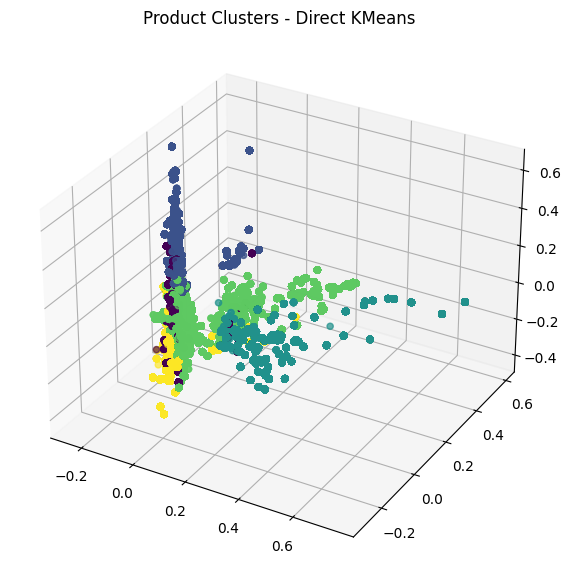

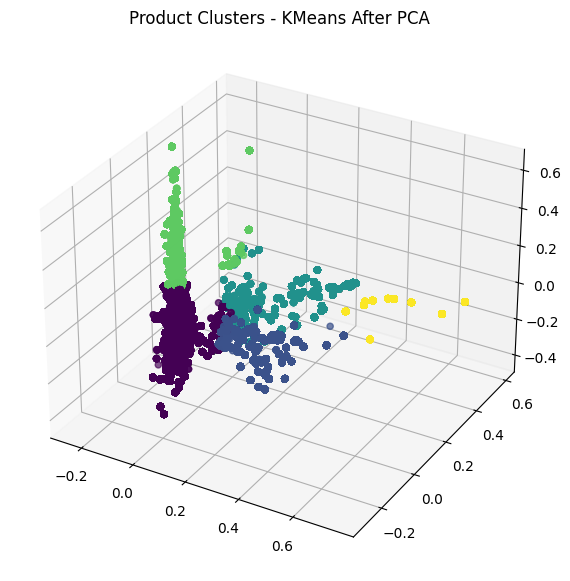

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load the Dataset
df = pd.read_csv('/content/drive/My Drive/data/clustering-data.csv', encoding='latin1')

# Preprocess the Data
def preprocess_text(text):
    # Tokenize, remove stopwords, and keep only alphabetic words
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(tokens)

# Applying the preprocessing function to the Description column
df['Processed_Description'] = df['Description'].dropna().apply(preprocess_text)

# Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Description'].dropna())

# Clustering - KMeans directly on TF-IDF Matrix
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters_direct = kmeans.fit_predict(tfidf_matrix)

# Dimensionality Reduction for Visualization - PCA
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Clustering after PCA
kmeans_after_pca = KMeans(n_clusters=num_clusters, random_state=42)
clusters_after_pca = kmeans_after_pca.fit_predict(reduced_features)

# Visualization - Direct KMeans Results
fig_direct = plt.figure(figsize=(10, 7))
ax_direct = fig_direct.add_subplot(111, projection='3d')
scatter_direct = ax_direct.scatter(reduced_features[:,0], reduced_features[:,1], reduced_features[:,2],
                     c=clusters_direct, cmap='viridis')
ax_direct.set_title('Product Clusters - Direct KMeans')
plt.show()

# Visualization - KMeans After PCA
fig_pca = plt.figure(figsize=(10, 7))
ax_pca = fig_pca.add_subplot(111, projection='3d')
scatter_pca = ax_pca.scatter(reduced_features[:,0], reduced_features[:,1], reduced_features[:,2],
                     c=clusters_after_pca, cmap='viridis')
ax_pca.set_title('Product Clusters - KMeans After PCA')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Assuming NLTK resources are already available in your environment

# Load the Dataset
df = pd.read_csv('/content/drive/My Drive/data/clustering-data.csv', encoding='latin1')

# Preprocess the Data
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(tokens)

# Applying the preprocessing function to the Description column
df['Processed_Description'] = df['Description'].dropna().apply(preprocess_text)

# Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Description'].dropna())

# Clustering - Direct KMeans on TF-IDF Matrix
num_clusters = 5
kmeans_direct = KMeans(n_clusters=num_clusters, random_state=42)
clusters_direct = kmeans_direct.fit_predict(tfidf_matrix)

# Calculate silhouette score for direct KMeans
silhouette_direct = silhouette_score(tfidf_matrix, clusters_direct)

# Dimensionality Reduction - PCA
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Clustering after PCA
kmeans_pca = KMeans(n_clusters=num_clusters, random_state=42)
clusters_pca = kmeans_pca.fit_predict(reduced_features)

# Calculate silhouette score for KMeans after PCA
silhouette_pca = silhouette_score(reduced_features, clusters_pca)

# Compare the silhouette scores
print(f"Silhouette Score - Direct KMeans: {silhouette_direct}")
print(f"Silhouette Score - KMeans after PCA: {silhouette_pca}")

**Answer**: Write your answer here